In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error 
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor    
import warnings


In [4]:
df = pd.read_csv('StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [6]:
X = df.drop(columns=['math score'],axis=1) 

In [7]:
y = df['math score']

In [10]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()  # Standardize the data
oh_transformer = OneHotEncoder()  # One hot encode the data 


preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
        
    ]
)


In [11]:
X = preprocessor.fit_transform(X)

In [13]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape 

((800, 19), (200, 19))

In [15]:
def evaluate_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    return mse,r2,mae

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dictionary of models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'SVR': SVR(),
    'CatBoostRegressor': CatBoostRegressor(verbose=0),
    'XGBRegressor': XGBRegressor(verbosity=0)
}

# Lists to store model names and R2 scores
model_list = []
r2_list = []

# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Iterate through each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate model performance
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    # Store model name and test R2 score
    model_list.append(model_name)
    r2_list.append(model_test_r2)
    
    # Print performance metrics
    print(f"\n{model_name}")
    print('-' * 35)
    print('Model performance for training set:')
    print(f"MAE: {model_train_mae:.4f}")
    print(f"RMSE: {model_train_rmse:.4f}")
    print(f"R2 score: {model_train_r2:.4f}")
    
    print('\nModel performance for testing set:')
    print(f"MAE: {model_test_mae:.4f}")
    print(f"RMSE: {model_test_rmse:.4f}")
    print(f"R2 score: {model_test_r2:.4f}")





LinearRegression
-----------------------------------
Model performance for training set:
MAE: 4.2671
RMSE: 5.3243
R2 score: 0.8743

Model performance for testing set:
MAE: 4.2158
RMSE: 5.3960
R2 score: 0.8803

Ridge
-----------------------------------
Model performance for training set:
MAE: 4.2650
RMSE: 5.3233
R2 score: 0.8743

Model performance for testing set:
MAE: 4.2111
RMSE: 5.3904
R2 score: 0.8806

Lasso
-----------------------------------
Model performance for training set:
MAE: 5.2063
RMSE: 6.5938
R2 score: 0.8071

Model performance for testing set:
MAE: 5.1579
RMSE: 6.5197
R2 score: 0.8253

KNeighborsRegressor
-----------------------------------
Model performance for training set:
MAE: 4.5167
RMSE: 5.7077
R2 score: 0.8555

Model performance for testing set:
MAE: 5.6210
RMSE: 7.2530
R2 score: 0.7838

DecisionTreeRegressor
-----------------------------------
Model performance for training set:
MAE: 0.0187
RMSE: 0.2795
R2 score: 0.9997

Model performance for testing set:
MAE: 6

In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2 Score']).sort_values('R2 Score', ascending=False)

,Model,R2 Score
1,Ridge,0.880593
0,LinearRegression,0.880345
8,CatBoostRegressor,0.851632
5,RandomForestRegressor,0.848466
6,AdaBoostRegressor,0.845495
9,XGBRegressor,0.827797
2,Lasso,0.825320
3,KNeighborsRegressor,0.783813
7,SVR,0.728600
4,DecisionTreeRegressor,0.719691


### Linear Regression

In [20]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train) 
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)
print("Accuracy of the model is %.2f" %score)   

Accuracy of the model is 0.88


### Plot y_pred and y_test

Text(0, 0.5, 'Predicted Scores')

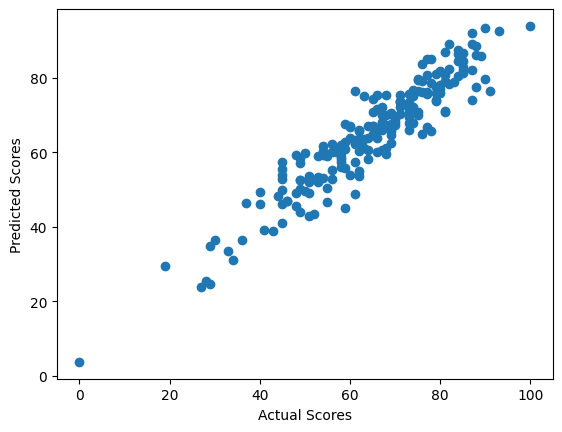

In [21]:
plt.scatter(y_test, y_pred) 
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")

<Axes: xlabel='math score'>

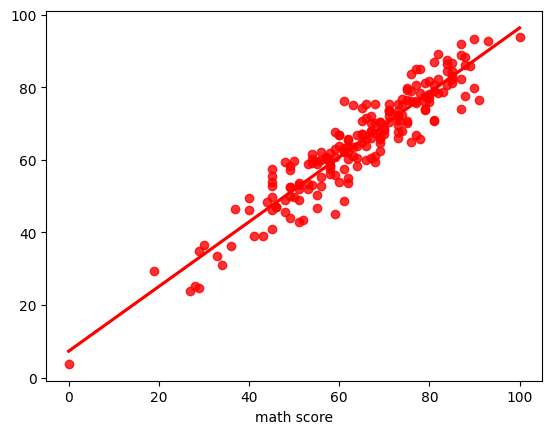

In [23]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="red")


In [27]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Difference': y_test - y_pred})

In [28]:
pred_df.head(10)

,Actual,Predicted,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
678,81,78.992188,2.007812
626,69,64.523438,4.476562
513,54,53.054688,0.945312
859,87,74.085938,12.914062
136,51,49.054688,1.945312
